<a href="https://colab.research.google.com/github/timcsmith/MIS536-Public/blob/master/Notebooks/Assignment02_SampleSolution_LIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment02 - Sample Solution - MIS536 Fall 2020


Sample solution to a question derived from:

Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python (First Edition) Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.


(c) 2020 Dr. Tim Smith


## Assignment Question/Wording

For assignment 2 you will apply k-NN to the UniversalBank.csv data (found on our GitHub website). 

Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use k-NN to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

You will find the required data on our GitHub site (and load it using the same techniques we have used in previous classes). The file UniversalBank.csv file contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Part A (15 points):**

* Create a new notebook called MIS536_Assignment2.ipynb
* Load data (UniversalBank.csv) directly from GitHub site
* Explore and Clean data (might want to clean column headers, as we've done in the past.
* Drop ID and Zip code columns (the should not be expected to be predictors)
* Create Dummy variables for Education column
* Partition the data into training (60%) and validation (40%) sets.
* Consider the following customer:
    * Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD * Account = 0, Online = 1, and Credit Card = 1.
    * Store this customer's data in a new dataframe called newCustomer

**Part B (10 points):**

* Perform a k-NN classification with all predictors (except ID and ZIP, which you should have dropped in Step A) using k = 1.
* Using k-NN, How would this customer be classified?

**Part C (15 points):**

* What is a choice of k that balances between overfitting and ignoring the predictor information?

## Sample Solution

In this notebook, you will find a sample solution to the Universal Bank to determine if a liability customer will accept ta loan office (become a personal loan customer). 

Before we begin, let's reflect on "the big picture":

> We're tasked to create a k-NN classifier to predict if a customer will become a Personal Load customer. With this classifier, our customer (the Bank) will predict if new customers will likely be (or become) a Loan Customer.

>To build our k-NN classifier, we're given 5000 records of customers. These records include a column that indicates if these customers are Personal Loan customers (or not). Each record also consists of another 13 other columns, for which we're asked to drop Zip and ID. Therefore, we have 11 columns that can be used as input to predict if a customer will become a Personal Loan customer).

>Once we have built our classifier, we can process new customers to determine (predict) if this will be a Personal Loan customer or not. 

> From the last class, we know that a k-NN classifier can accept any number of inputs; therefore, having 11 predictors/inputs is not a problem. We also know that k-NN is sensitive to differences in scale between our variables. So we must be sure to get all our prediction variables (input) in the same scale. 

Now, let's dig into the details - but first, we must load the libraries we will be using:


Before we begin, let's load the packages that we will use...


In [1]:
# Import required packages 
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Part A

#### Load data from GitHub

In [2]:
# Load the data direct from GitHub
bank_df = pd.read_csv('https://github.com/timcsmith/MIS536-Public/raw/master/Data/UniversalBank.csv')

# Let's do a quick exploration of the data... 

bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


#### Quickly explore the data and fix any obvious problems


Here, I explore the number of columns, see what the colum names look like (and remove whitespace and rename when it will make it easier to work with, and check occurances of NaN (missing values).

In [3]:
# do the column names look good?
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
# let's replace any spaces in the column names with underscore
bank_df.columns = [s.strip().replace(' ','_') for s in bank_df.columns] # list comprehension, all columns

In [5]:
# let's check to see if there is a problem with missing values
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no issues with missing values in this data. 

> NOTE: If there were any missing values, we'd need to decide if we wanted to drop the record, or impute a value for the missing value. (see <a href="https://github.com/timcsmith/MIS536-Public/blob/master/Notebooks/Class02_3_Cleaning_Data.ipynb" target="_blank">Class02 Notebook</a> on Cleaning data, note the sections  "Replacing missing data with median", and "Replacing bad data with median)

We can also look at the proportion of the data for each of our target variables -- we find that this is somewhere around 9.6%, but since we have a rather large sample (5000), we will have many records with both clssification, so this should be fine.





In [6]:
bank_df['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

#### Drop the ID and zip code columns

In [7]:
bank_df = bank_df.drop(columns=['ID', 'ZIP_Code'])

#### Create dummy variables for Education 

In [8]:
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


#### split dataset into training (60%) and validation (40%) sets

In [9]:
train_df, validation_df = train_test_split(bank_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)

Training set: (3000, 14) Validation set: (2000, 14)


#### Create a dataframe and store a new customer

In [10]:
newCustomer = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 'CCAvg': 2, 'Mortgage': 0,
                             'Securities_Account': 0, 'CD_Account': 0, 'Online': 1, 'CreditCard': 1, 'Education_1': 0, 
                             'Education_2': 1, 'Education_3': 0}])
newCustomer

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,40,10,84,2,2,0,0,0,1,1,0,1,0


### Part B

#### Perform a k-NN classification with all predictors (except ID and ZIP, which you should have dropped in Step A) using k = 1.


As discussed in class, k-NN can be especially sensitive to variables with different scales. Therefore, we first need to use one of the methods covered in class to transform our variables to a common scale. For this analysis, I've chosen standardization (this is the same method that was used in the sample code)

##### Transform our input (predictor variables).

In [11]:
# to reduce repetition in later code, let's create variables to represent the columns
# that are our predictors, and outcome
target = 'Personal_Loan'
predictors = list(bank_df.columns)
predictors.remove(target)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training, validation and newCustomer
train_predictors = scaler.transform(train_df[predictors])
train_target = train_df[target]
validation_predictors = scaler.transform(validation_df[predictors])
validation_target = validation_df[target]

# Transform the the newCutomerNorm data using our scaler (note that all the data
# are predictor columns -- we don't know what the outcome for this customer is. 
# We'll use our classifier to predict is this customer is a likely Loan Customer)
newCustomerNorm = pd.DataFrame(scaler.transform(newCustomer), columns=predictors)

Train a 1-NN classifier using our Standardized training set predictor variables

In [12]:
# k-NN using k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_predictors, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Predict if the new customer will be a Personal Loan customer using our new 1-NN classifier.

In [13]:
# predicted class
knn.predict(newCustomerNorm)

array([0])

New customer is predicted to not accept a loan offer.

### Part C

#### What is a choice of k that balances between overfitting and ignoring the predictor information?

In [14]:
# Train a classifier for different values of k
results = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_predictors, train_target)
    results.append({
        'k': k,
        'accuracy': accuracy_score(validation_target, knn.predict(validation_predictors))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.9545
1,3,0.9535
2,5,0.9565
3,7,0.9520
4,9,0.9475
5,11,0.9465
6,13,0.9450
7,15,0.9440
8,17,0.9415
9,19,0.9405


Though it's not necessary, I have plotted these results to more easily see which value of k we might choose. 

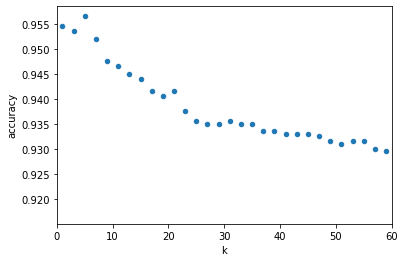

In [17]:
# plot accuracy vs. k
_ = results.plot.scatter(x='k', y='accuracy', xlim=[0, 60])

We choose the best k, which minimizes the misclassification rate in the validation set. Our best k is `k=5`

#### Extra: See what our prediction would be with k=5

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_predictors, train_target)
knn.predict(newCustomerNorm)

array([0])

We see that this classifier also prediccted that this customer will not be a Loan Customer. As a general rule, choose the lowest k value that produces the lowest misclassification rate. When the miscalculation rate is almost equal between two or more k-values, choose the lower value.